## DIGITS Decision Tree

In [73]:
%matplotlib inline

import numpy as np                      # Llibreria matemÃ tica
import matplotlib.pyplot as plt         # Per mostrar plots
import sklearn                          # Llibreia de DM
import sklearn.datasets as ds           # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb          # Per fer servir el knn
import pandas as pd

from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.proportion import proportion_confint
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [92]:
#Function that shows the confusion matrix with a pretty Layout
def  prettyConfusionMatrix(confmat):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
  ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(confmat.shape[0]):
      for j in range(confmat.shape[1]):
          ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=7)

  plt.xlabel('Predicted label')
  plt.ylabel('True label')

  plt.tight_layout()
  plt.savefig('ConMatrix.png', dpi=600)
  plt.show()
  return


### Load data

In [115]:
drive.mount("/content/drive")

df = pd.read_csv('/content/drive/MyDrive/Q8/MD/Projecte2/preprocessed.csv')

df_encoded = pd.read_csv('/content/drive/MyDrive/Q8/MD/Projecte2/preprocessed_encoded.csv')

# Display the preprocessed data
#print(df_encoded)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
y = df['match']

df_encoded = df_encoded.drop(columns=['decision_0'])
df_encoded = df_encoded.drop(columns=['decision_1'])
df_encoded = df_encoded.drop(columns=['decision_o_0'])
df_encoded = df_encoded.drop(columns=['decision_o_1'])

X = df_encoded

# Split the dataset in training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Normalization of the data starting from information of just the training set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Apply the scaler to the test set
X_test = scaler.transform(X_test)

### Balance dataset

In [120]:
# Assuming X_train and y_train are your training data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train your model using the balanced dataset
clf = GaussianNB()
clf.fit(X_resampled, y_resampled)

# Make predictions
y_pred = clf.predict(X_test)

print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.15      0.26      2100
           1       0.17      0.91      0.29       414

    accuracy                           0.27      2514
   macro avg       0.53      0.53      0.27      2514
weighted avg       0.78      0.27      0.26      2514



## Train Naive Bayes to compare results


------------------Naive Bayes--------------------
Metrics of Unbalanced Dataset



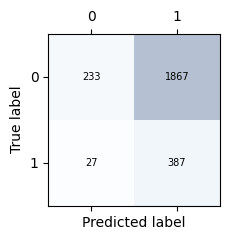


Accuracy: 0.2466189339697693

              precision    recall  f1-score   support

           0       0.90      0.11      0.20      2100
           1       0.17      0.93      0.29       414

    accuracy                           0.25      2514
   macro avg       0.53      0.52      0.24      2514
weighted avg       0.78      0.25      0.21      2514

--------------------------------------

Metrics of Balanced Dataset



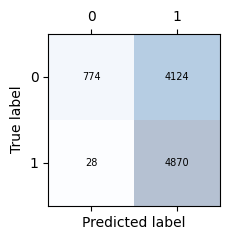


Accuracy: 0.5761535320538995
              precision    recall  f1-score   support

           0       0.97      0.16      0.27      4898
           1       0.54      0.99      0.70      4898

    accuracy                           0.58      9796
   macro avg       0.75      0.58      0.49      9796
weighted avg       0.75      0.58      0.49      9796

0.5761535320538995


In [124]:
print("------------------Naive Bayes--------------------")
print("Metrics of Unbalanced Dataset")
print()

clf = GaussianNB()
pred = clf.fit(X_train, y_train).predict(X_test)
confmat = sklearn.metrics.confusion_matrix(y_test, pred)

prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()

print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

print("--------------------------------------")
print()
print("Metrics of Balanced Dataset")
print()

clfB = GaussianNB()
predB = clf.fit(X_resampled, y_resampled).predict(X_resampled)
confmat = sklearn.metrics.confusion_matrix(y_resampled, predB)

prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_resampled, predB))

report = sklearn.metrics.classification_report(y_resampled, predB)

print(sklearn.metrics.classification_report(y_resampled, predB))
epsilonB = sklearn.metrics.accuracy_score(y_resampled, predB)
print(epsilonB)



### Train and Print A Decision Tree

Metrics of the Dataset

0.7859984089101034


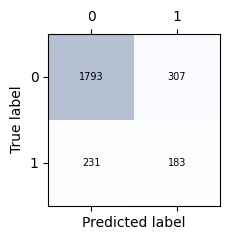

None

Accuracy: 0.7859984089101034

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2100
           1       0.37      0.44      0.40       414

    accuracy                           0.79      2514
   macro avg       0.63      0.65      0.64      2514
weighted avg       0.80      0.79      0.79      2514

(0.7695216760047207, 0.8017466172216029)


--------------------------------------


Metrics of Balanced Dataset

1.0


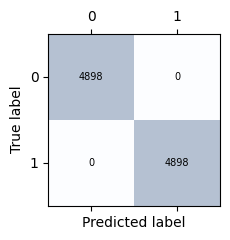


Accuracy: 1.0



Class Name,precision,recall,f1-score,support
0,1.00,1.00,1.00,4898
1,1.00,1.00,1.00,4898


macro avg,1.00,1.00,9796,None
weighted avg,1.00,1.00,1.00,9796
,None,None,None,None


(0.9995889083493541, 1.0)


In [126]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)

print("Metrics of the Dataset")
print()

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

confmat = sklearn.metrics.confusion_matrix(y_test, pred)
print(prettyConfusionMatrix(confmat))

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, pred))
print()

print(sklearn.metrics.classification_report(y_test, pred))
epsilon = sklearn.metrics.accuracy_score(y_test, pred)

print(proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test'))

print()
print()
print("--------------------------------------")
print()
print()
print("Metrics of Balanced Dataset")
print()

clfB = tree.DecisionTreeClassifier(criterion='entropy')
clfB = clf.fit(X_resampled, y_resampled)
predB = clf.predict(X_resampled)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_resampled, y_resampled))
confmat = sklearn.metrics.confusion_matrix(y_resampled, predB)
prettyConfusionMatrix(confmat)

print()
print("Accuracy:", sklearn.metrics.accuracy_score(y_resampled, predB))
print()

prettyReport(sklearn.metrics.classification_report(y_resampled, predB))
epsilon = sklearn.metrics.accuracy_score(y_resampled, predB)

print(proportion_confint(count=epsilon*X_resampled.shape[0], nobs=X_resampled.shape[0], alpha=0.05, method='binom_test'))



### Representation of a Decision *Tree*

0.8046937151949085


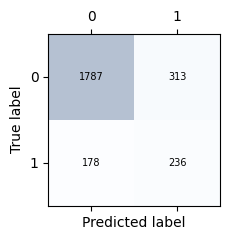


Accuracy: 0.8046937151949085

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2100
           1       0.43      0.57      0.49       414

    accuracy                           0.80      2514
   macro avg       0.67      0.71      0.68      2514
weighted avg       0.83      0.80      0.82      2514



<Figure size 80000x8000 with 0 Axes>

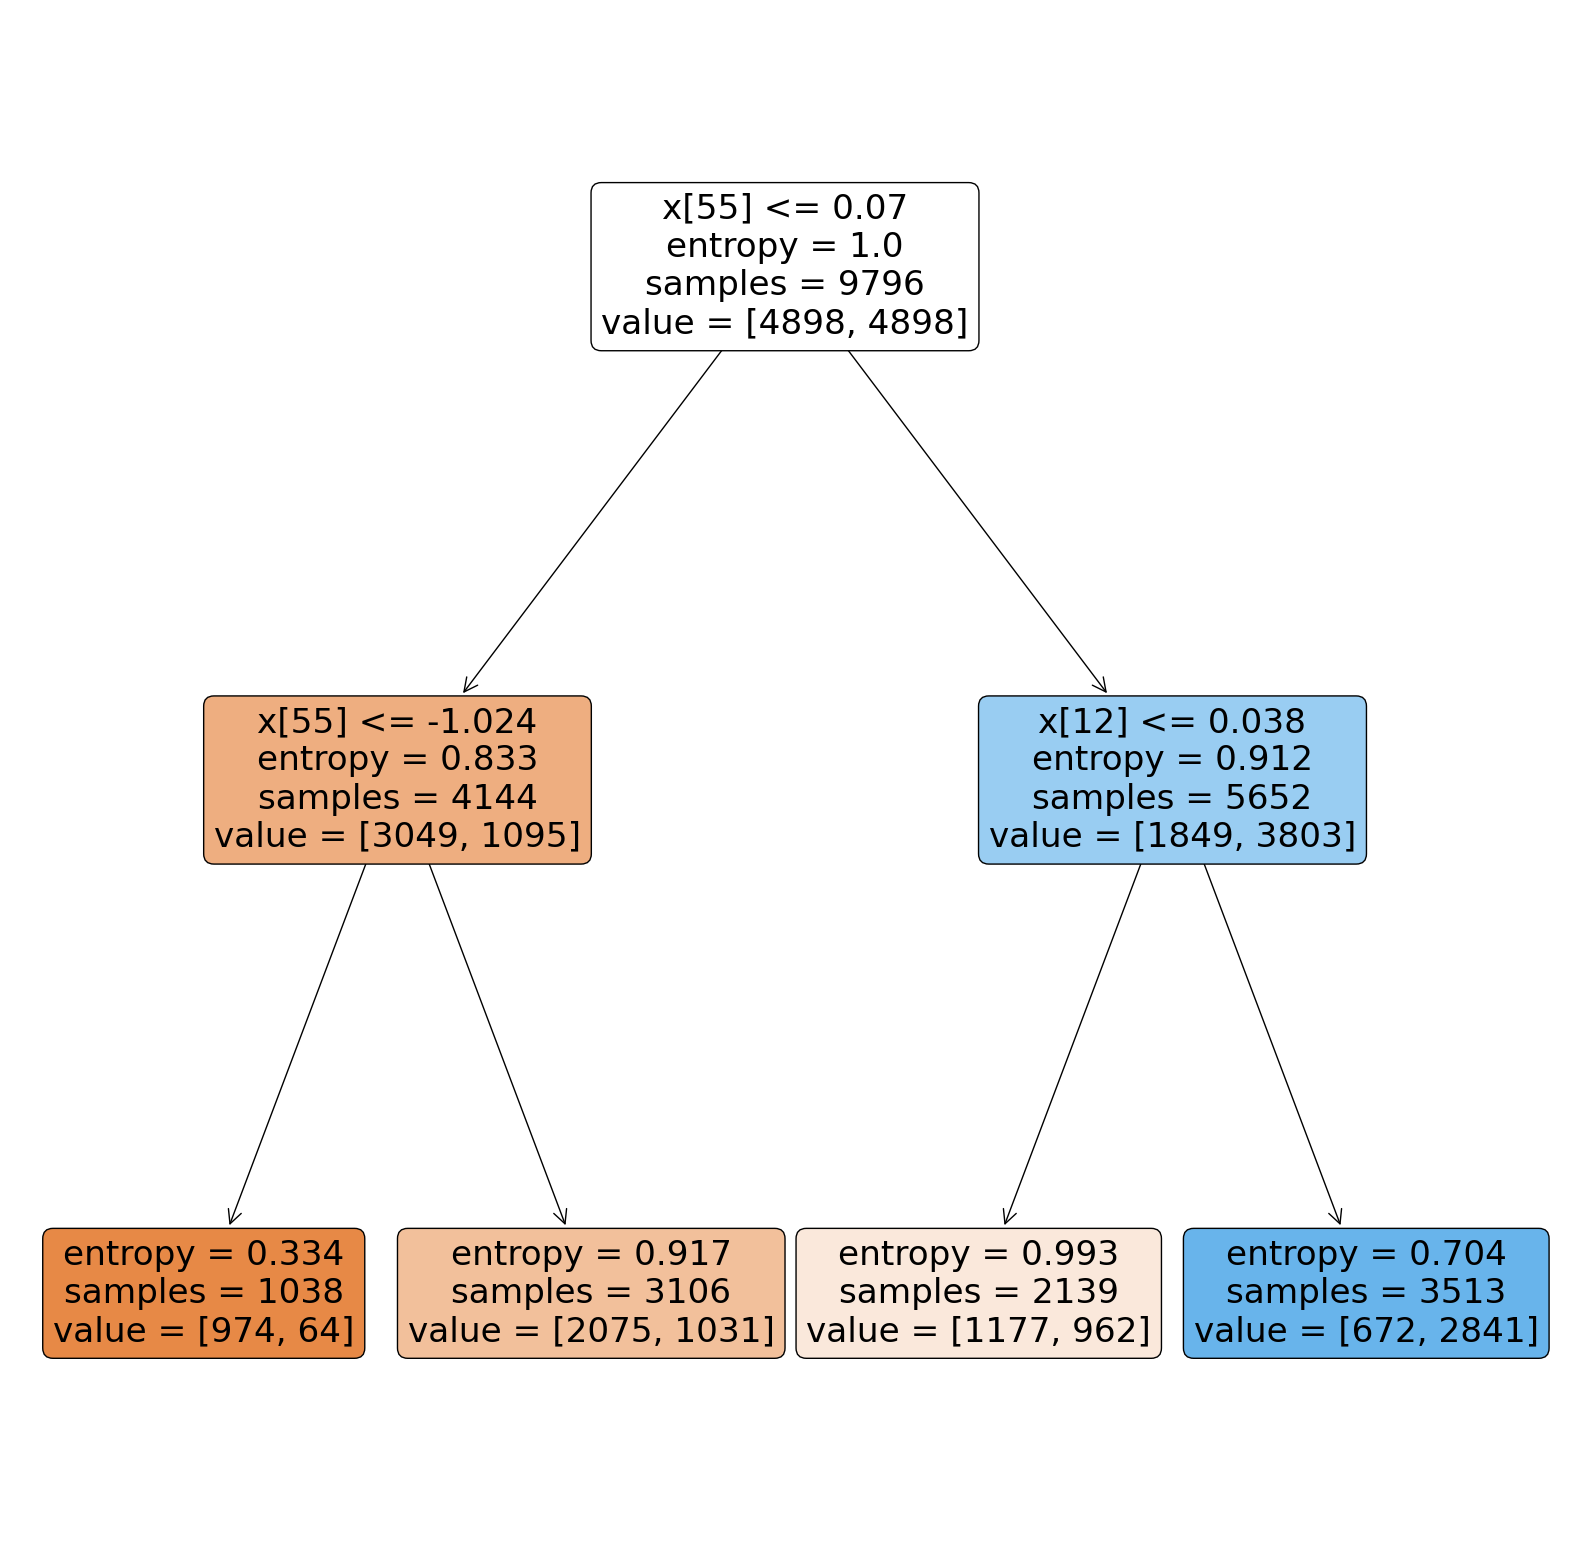

In [128]:
clf = DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = 4,
    min_impurity_decrease = 0.02
)
clf = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(clf.score(X_test, y_test))

confmat = sklearn.metrics.confusion_matrix(y_test, prediction)
prettyConfusionMatrix(confmat)

print(f"\nAccuracy: {accuracy_score(y_test, prediction)}\n")

print(classification_report(y_test, prediction))
epsilon = accuracy_score(y_test, prediction)

fig = plt.gcf()
fig.set_size_inches(800, 80)
plt.figure(figsize=(20,20))
plot_tree(clf, filled=True,rounded=True)
#fig.savefig('tree.png')
plt.show()

### Selecting the best parameters

In [98]:
from sklearn.model_selection import GridSearchCV

params = {
    "min_impurity_decrease": list(np.linspace(0,0.5,21)),
    "min_samples_split":list(range(2,20,11))
}
clf = GridSearchCV(
    DecisionTreeClassifier(criterion = "entropy"),
    param_grid = params,
    cv = 10,  # OBS: # If cv is integer, by default is Stratifyed
    n_jobs = -1
)
clf.fit(X_train, y_train)
print(f"Best Params = {clf.best_params_}  -  Accuracy = {clf.best_score_}")

Best Params = {'min_impurity_decrease': 0.025, 'min_samples_split': 2}  -  Accuracy = 0.8352663802175695


In [99]:
cdt= DecisionTreeClassifier(
    criterion = "entropy",
    min_samples_split = clf.best_params_["min_samples_split"],
    min_impurity_decrease = clf.best_params_["min_impurity_decrease"]
)
clf = cdt.fit(X_train, y_train)
pred = clf.predict(X_test)

# Obtain accuracy score of learned classifier on test data
print(f"prediction: {[pred]}")
print(clf.score(X_test, y_test))
print(confusion_matrix(y_test, pred))
print(f"\nAccuracy: {accuracy_score(y_test, pred)}\n")
print(classification_report(y_test, pred))

epsilon = accuracy_score(y_test, pred)
print(epsilon)

prediction: [array([0, 0, 0, ..., 0, 0, 0])]
0.8353221957040573
[[2100    0]
 [ 414    0]]

Accuracy: 0.8353221957040573

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2100
           1       0.00      0.00      0.00       414

    accuracy                           0.84      2514
   macro avg       0.42      0.50      0.46      2514
weighted avg       0.70      0.84      0.76      2514

0.8353221957040573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
